In [228]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import spotipy

In [229]:
sns.set_style("darkgrid")

In [230]:
df = pd.read_csv("top_tracks.csv")
df

,name,artists,acousticness,energy,instrumentalness,key,loudness,tempo,valence,genres
0,Front Street,Will Wood and the Tapeworms,0.003020,0.925,0.000025,0,-4.039,134.313,0.4840,"new jersey indie, pov: indie"
1,Sharpen Your Teeth,Save Face,0.000008,0.984,0.000004,9,-3.289,86.095,0.5480,"new jersey indie, pov: indie, pop punk"
2,PRESSURE BOMB 3?!?!,Jhariah,0.001090,0.875,0.000000,7,-6.409,110.030,0.3510,"new jersey indie, pov: indie, pop punk, multid..."
3,Thank You for the Venom,My Chemical Romance,0.002370,0.977,0.000000,7,-3.463,103.501,0.4130,"new jersey indie, pov: indie, pop punk, multid..."
4,Dead!,My Chemical Romance,0.003700,0.973,0.000877,7,-1.945,99.331,0.3620,"new jersey indie, pov: indie, pop punk, multid..."
5,"Give 'Em Hell, Kid",My Chemical Romance,0.023400,0.993,0.000000,4,-3.079,183.773,0.1180,"new jersey indie, pov: indie, pop punk, multid..."
6,Reassemble,A Day To Remember,0.002350,0.912,0.002330,11,-5.996,168.111,0.0679,"new jersey indie, pov: indie, pop punk, multid..."
7,Please Murder Me,Save Face,0.789000,0.334,0.000000,11,-7.966,157.900,0.1620,"new jersey indie, pov: indie, pop punk, multid..."
8,The End.,My Chemical Romance,0.082700,0.548,0.000000,2,-4.977,175.053,0.2070,"new jersey indie, pov: indie, pop punk, multid..."
9,Lotta True Crime,Penelope Scott,0.325000,0.407,0.064500,8,-14.462,159.089,0.4030,"new jersey indie, pov: indie, pop punk, multid..."


In [231]:
df.isna().sum()

name                0
artists             0
acousticness        0
energy              0
instrumentalness    0
key                 0
loudness            0
tempo               0
valence             0
genres              0
dtype: int64

In [232]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              20 non-null     object 
 1   artists           20 non-null     object 
 2   acousticness      20 non-null     float64
 3   energy            20 non-null     float64
 4   instrumentalness  20 non-null     float64
 5   key               20 non-null     int64  
 6   loudness          20 non-null     float64
 7   tempo             20 non-null     float64
 8   valence           20 non-null     float64
 9   genres            20 non-null     object 
dtypes: float64(6), int64(1), object(3)
memory usage: 1.7+ KB


In [233]:
df.shape

(20, 10)

In [234]:
df.columns

Index(['name', 'artists', 'acousticness', 'energy', 'instrumentalness', 'key',
       'loudness', 'tempo', 'valence', 'genres'],
      dtype='object')

In [235]:
df.describe()

,acousticness,energy,instrumentalness,key,loudness,tempo,valence
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.144561,0.757200,0.007874,5.500000,-5.990150,127.563800,0.346045
std,0.257392,0.241848,0.022784,4.006574,3.576255,31.089229,0.150449
min,0.000008,0.235000,0.000000,0.000000,-16.156000,86.095000,0.067900
25%,0.000918,0.600500,0.000000,2.000000,-6.648750,101.257750,0.230250
50%,0.003580,0.873000,0.000002,6.000000,-5.038500,129.030000,0.382500
75%,0.143275,0.950750,0.001968,8.250000,-3.938000,157.923500,0.474000
max,0.789000,0.993000,0.083200,11.000000,-1.945000,183.773000,0.569000


In [236]:
# graph that shows mean, median mode of all these

IndexError: index 9 is out of bounds for axis 0 with size 9

/Users/yinuotang/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26149 (\N{CJK UNIFIED IDEOGRAPH-6625}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yinuotang/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12402 (\N{HIRAGANA LETTER HI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yinuotang/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12373 (\N{HIRAGANA LETTER SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yinuotang/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12366 (\N{HIRAGANA LETTER GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yinuotang/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12520 (\N{KATAKANA LETTER YO}) missing fro

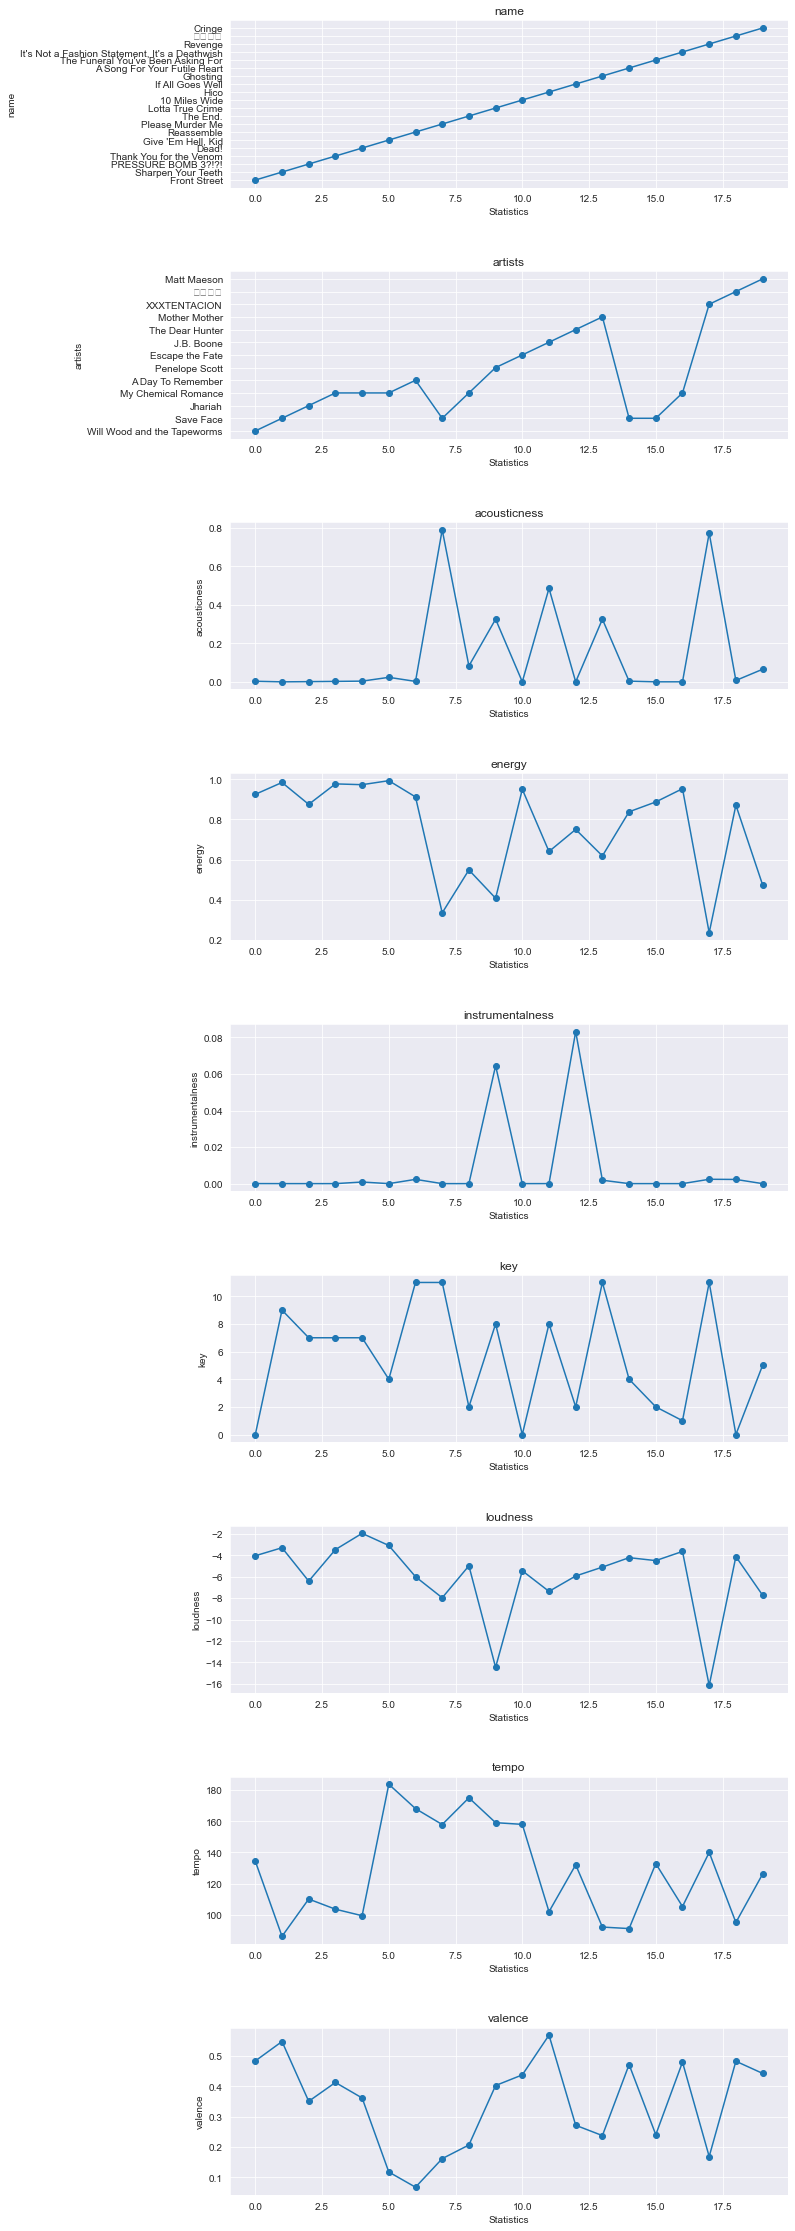

In [240]:
df2 = df
df2.transpose()
fig, axs = plt.subplots(9, 1, figsize=(10, 40))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(df2.columns):
    axs[i].plot(df2.index, df2[column], marker='o')
    axs[i].set_title(column)
    axs[i].set_xlabel('Statistics')
    axs[i].set_ylabel(column)
plt.show()

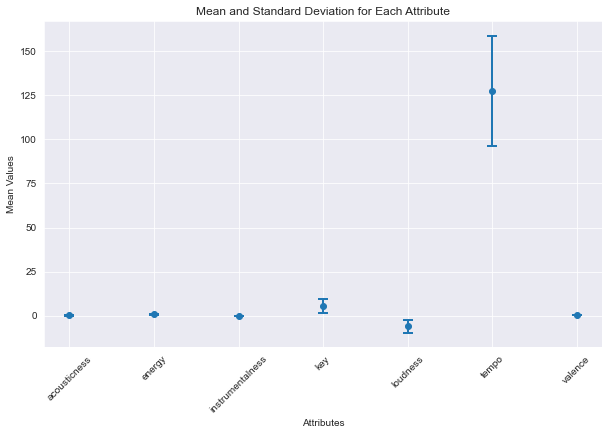

In [239]:
df4 = df.describe().transpose()
mean_values = df4['mean']
std_values = df4['std']
# mean_values
# std_values

# Create the plot
plt.figure(figsize=(10, 6))
plt.errorbar(df4.index, mean_values, yerr=std_values, fmt='o', capsize=5, capthick=2, elinewidth=2)

# Customize the plot
plt.title('Mean and Standard Deviation for Each Attribute')
plt.xlabel('Attributes')
plt.ylabel('Mean Values')
plt.xticks(rotation=45)  # Rotate attribute names for better readability
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
###Top Artists

In [ ]:
top_artists = df.groupby("artists").count().sort_values(by="name", ascending = False)["name"][:5]
top_artists

In [186]:
all_genres = df['genres'].str.split(', ').explode()
genre_counts = Counter(all_genres)

top_genres = genre_counts.most_common(10)

print(top_genres)

[('pop punk', 131), ('pov: indie', 121), ('emo', 64), ('modern rock', 64), ('rock', 64), ('alternative metal', 24), ('metalcore', 24), ('neon pop punk', 24), ('screamo', 24), ('new jersey indie', 20)]


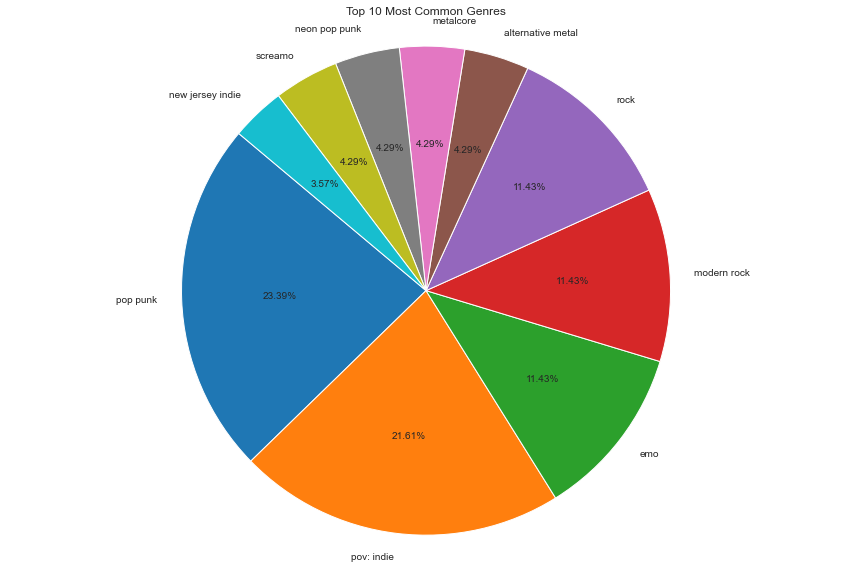

In [187]:
labels, sizes = zip(*top_genres)

plt.figure(figsize=(15, 10))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=140)
plt.axis('equal')
plt.title('Top 10 Most Common Genres')
plt.show()

In [191]:
df3 = pd.read_csv("recs.csv")
df3

,name,artists
0,Never Let This Go,Paramore
1,(Coffee's For Closers),Fall Out Boy
2,Besitos,Pierce The Veil
3,So I Shotgunned a Beer and Went to Bed,Snowing
4,Monsters,Matchbook Romance
5,This Photograph Is Proof (I Know You Know),Taking Back Sunday
6,I've Got A Dark Alley And A Bad Idea That Says...,Fall Out Boy
7,Crawling,Linkin Park
8,All We Know,Paramore
9,Your Betrayal,Bullet For My Valentine
